In [23]:
import pandas as pd


In [24]:
df=pd.read_csv('Gender_Height_Weight.csv')
df.tail(5)

,Gender,Height,Weight
195,Male,145,108
196,Male,157,74
197,Female,177,117
198,Female,166,144
199,Male,193,151


In [25]:
# Chuẩn hóa dữ liệu
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Gender']=label_encoder.fit_transform(df['Gender'])
df.tail(5)

,Gender,Height,Weight
195,1,145,108
196,1,157,74
197,0,177,117
198,0,166,144
199,1,193,151


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Gender  200 non-null    int32
 1   Height  200 non-null    int64
 2   Weight  200 non-null    int64
dtypes: int32(1), int64(2)
memory usage: 4.0 KB


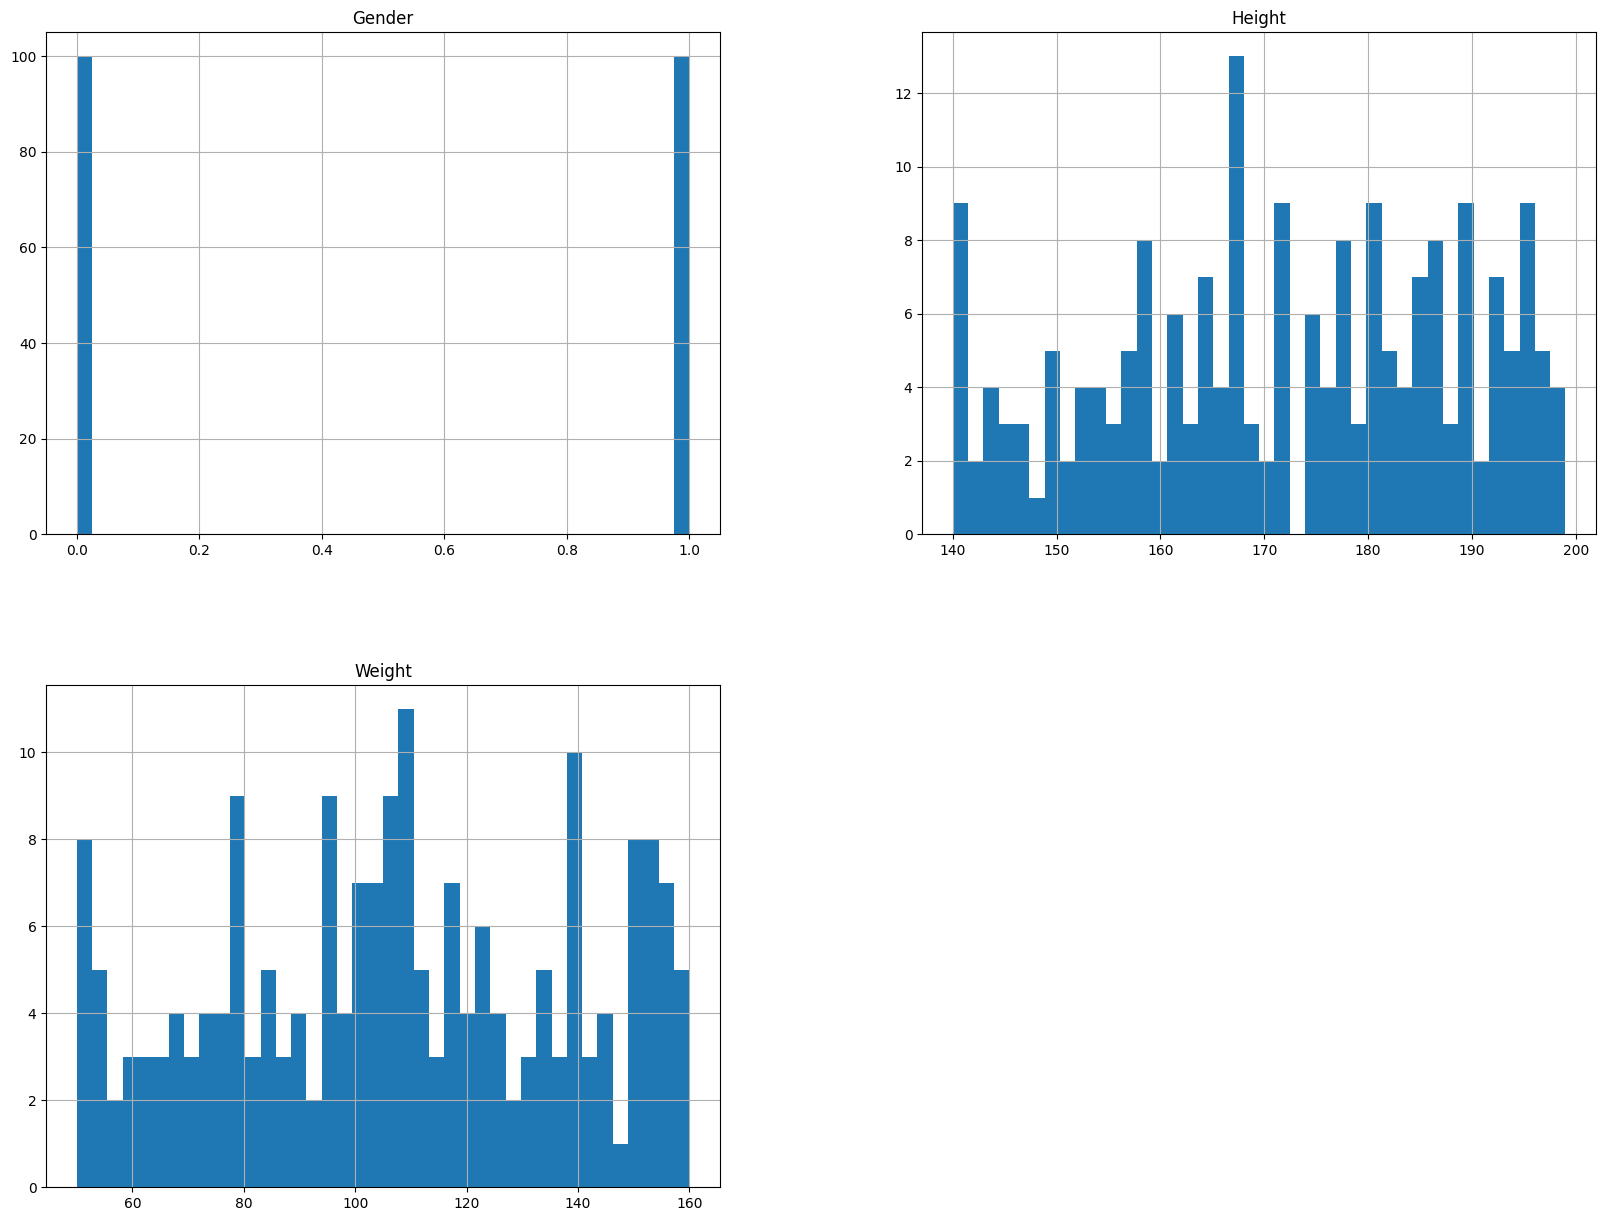

In [27]:
import matplotlib.pyplot as plt
df.hist(figsize=(20,15),bins=40)
plt.show()

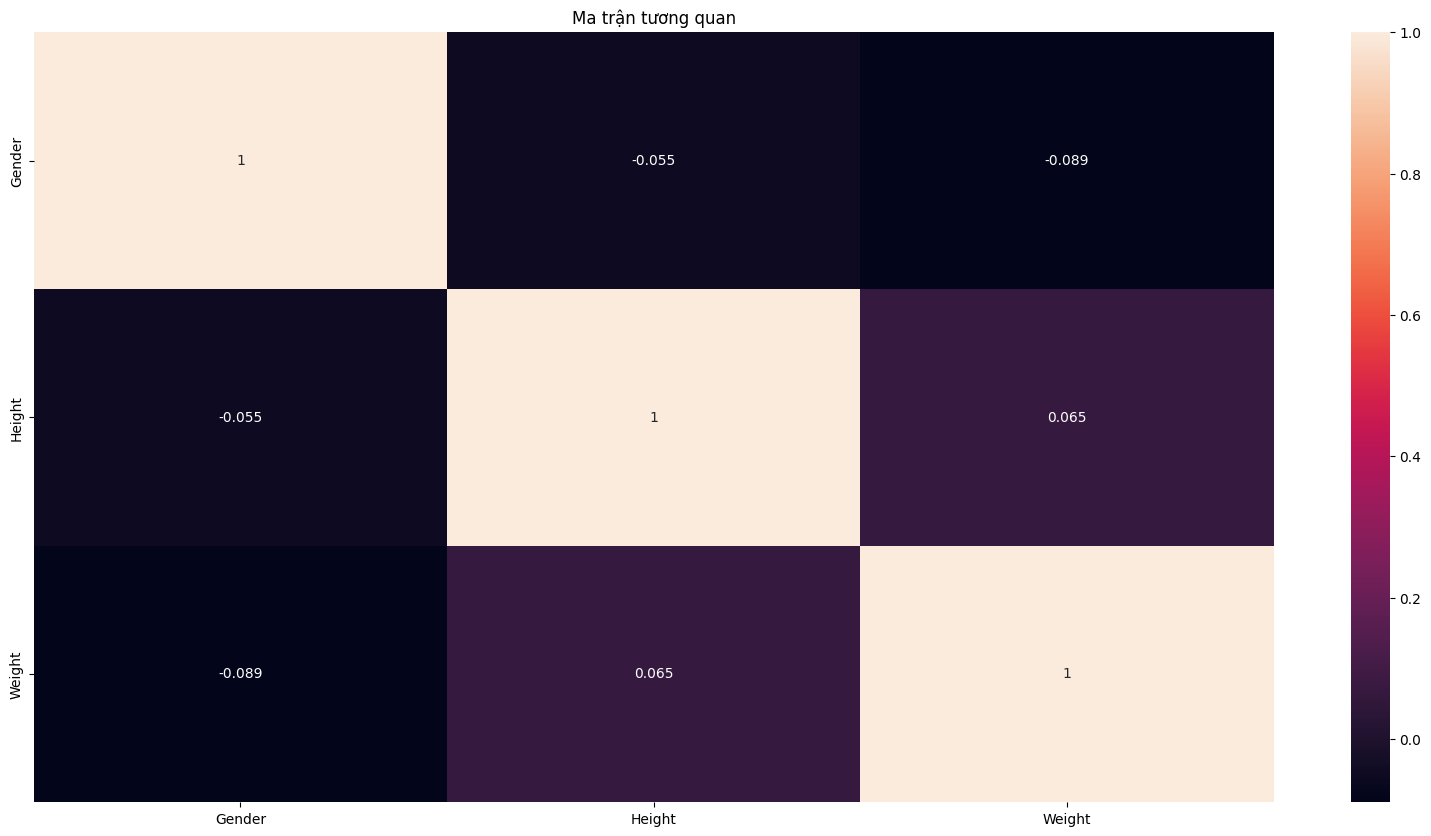

In [28]:
import seaborn as sns
# Thể hiện ma trận tương quan
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Ma trận tương quan')
plt.show()

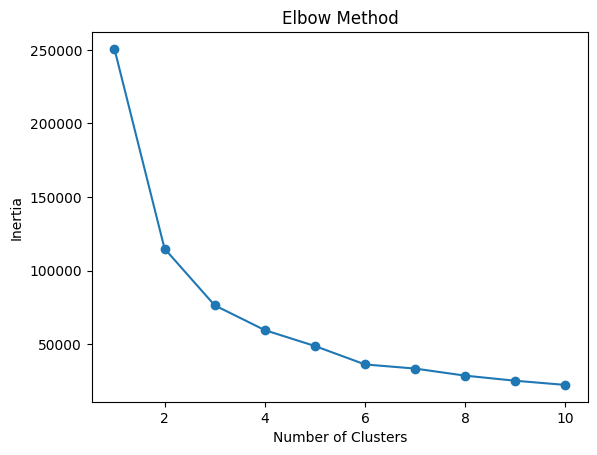

In [29]:
from sklearn.cluster import KMeans
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

# Vẽ đồ thị Elbow
plt.plot(range(1, 11), inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


In [30]:
# Vì điểm tối ưu là điểm mà ở đó k bắt đầu giảm đều, tức là k=3 sẽ là tối ưu nhất

In [31]:
X=df.values
k=3
# Khởi tạo và huấn luyện mô hình K-means
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)

# Hiển thị kết quả
print(f"\nK = {k}:")
print(f"Tâm cụm (cluster centers):\n{kmeans.cluster_centers_}")
print(f"Nhãn cụm (cluster labels):\n{labels}")


K = 3:
Tâm cụm (cluster centers):
[[  0.54878049 174.30487805 106.96341463]
 [  0.4        171.86666667 145.26666667]
 [  0.53448276 168.53448276  68.62068966]]
Nhãn cụm (cluster labels):
[0 0 0 0 2 0 0 0 0 0 2 2 0 2 2 0 0 1 1 1 0 1 0 1 2 2 0 2 1 1 0 2 2 1 1 1 0
 2 1 2 0 0 2 0 0 2 0 0 2 1 1 2 0 0 0 0 0 1 2 2 2 1 2 2 1 1 0 2 2 1 2 0 2 2
 0 1 0 0 0 2 2 1 0 0 0 2 1 0 0 1 1 0 0 2 0 1 2 1 2 2 1 0 1 1 1 0 1 1 0 2 2
 1 1 0 0 2 2 0 0 1 2 0 1 1 1 0 0 2 1 2 1 2 1 0 1 1 1 0 1 0 2 2 1 0 2 0 0 1
 0 0 2 2 2 1 0 0 2 1 0 0 0 2 0 1 0 2 0 0 2 2 1 1 1 1 1 0 0 0 1 0 2 0 0 2 0
 2 1 2 1 0 2 0 0 1 0 0 2 0 1 1]


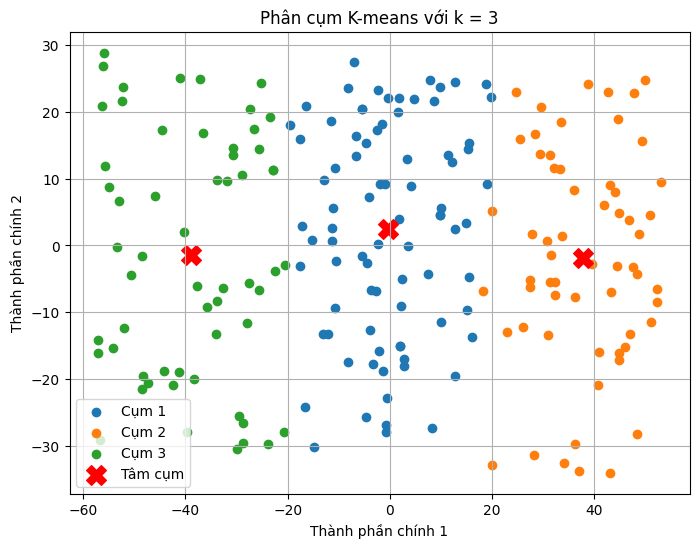

In [32]:
X=df.values
k=3
# Áp dụng K-means
kmeans = KMeans(n_clusters=k, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Sử dụng PCA để giảm số chiều xuống 2D
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Trực quan hóa dữ liệu
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X_reduced[y_kmeans == i, 0], X_reduced[y_kmeans == i, 1], label=f'Cụm {i+1}')

# Hiển thị tâm cụm (sau PCA)
centers_reduced = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_reduced[:, 0], centers_reduced[:, 1], 
            s=200, c='red', marker='X', label='Tâm cụm')

plt.title(f'Phân cụm K-means với k = {k}')
plt.xlabel('Thành phần chính 1')
plt.ylabel('Thành phần chính 2')
plt.legend()
plt.grid(True)
plt.show()